## 1. Import packages and Load dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pip install --index-url https://test.pypi.org/simple/ --no-deps my_krml_ratana

Looking in indexes: https://test.pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from my_krml_ratana.data.sets import df_report

In [4]:
df = pd.read_csv('../../data/interim/df_master.csv')

In [5]:
df

,cc_num,gender,city,state,zip,lat,long,city_pop,acct_num,job_category,age,trans_num,category,amt,is_fraud,merchant,merch_lat,merch_long,timestamp
0,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,65,91ab12e73ef38206e1121e9648d2408d,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,2019-05-24 17:39:10
1,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,65,071553d533a6822a4431c354c434ddcb,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,2019-09-25 15:31:59
2,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,65,0cfad38ef15e4749eff68dc83f62c151,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,2019-12-24 16:40:01
3,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,65,5782693d7c70f062f258cb30bfa8900f,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,2019-10-18 19:50:38
4,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,65,35fd7db657d7e30dd608c37f7798186e,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,2019-02-10 23:13:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,82,4eafc5b16da625c3436f2484d8dcabcb,health_fitness,7.47,0,"Horton, Ware and Reynolds",27.707908,-82.320308,2021-07-30 09:22:23
4260900,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,82,041b18f68b893b68e7aa29c16a08a08d,food_dining,2.30,0,Hanson and Sons,27.896372,-83.387356,2021-06-28 11:38:46
4260901,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,82,a26df5348dfee4839f0fa00155e2ed1c,health_fitness,5.82,0,White LLC,27.110602,-82.426821,2021-08-24 09:37:49
4260902,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,82,e388fc8055b1426c62640baaae10108f,health_fitness,9.16,0,Snyder-Johnson,28.110510,-81.891797,2021-08-26 11:16:35


## 2. Creating target variable

Since our goal is to predict monthly spending of each customer for next month we need to create a monthly spending amount (target variable)

Before building the model we need to consider if there are enough data points to create one model per customers. This is important when we decide train/test/validation split
   

In [6]:
transaction_counts = df.groupby('cc_num').size().reset_index(name='transaction_count')

In [7]:
transaction_counts

,cc_num,transaction_count
0,60400268763,5101
1,60406155816,6910
2,60429276409,7631
3,60432200743,5454
4,60434956110,9476
...,...,...
978,4966177182498980888,3639
979,4967150066664110652,7630
980,4968827697040953141,4384
981,4983665528993160877,5096


In [8]:
# Create year and month features from timestamp

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month

In [9]:
df

,cc_num,gender,city,state,zip,lat,long,city_pop,acct_num,job_category,...,trans_num,category,amt,is_fraud,merchant,merch_lat,merch_long,timestamp,year,month
0,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,91ab12e73ef38206e1121e9648d2408d,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,2019-05-24 17:39:10,2019,5
1,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,071553d533a6822a4431c354c434ddcb,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,2019-09-25 15:31:59,2019,9
2,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,0cfad38ef15e4749eff68dc83f62c151,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,2019-12-24 16:40:01,2019,12
3,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,5782693d7c70f062f258cb30bfa8900f,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,2019-10-18 19:50:38,2019,10
4,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,35fd7db657d7e30dd608c37f7798186e,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,2019-02-10 23:13:20,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,...,4eafc5b16da625c3436f2484d8dcabcb,health_fitness,7.47,0,"Horton, Ware and Reynolds",27.707908,-82.320308,2021-07-30 09:22:23,2021,7
4260900,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,...,041b18f68b893b68e7aa29c16a08a08d,food_dining,2.30,0,Hanson and Sons,27.896372,-83.387356,2021-06-28 11:38:46,2021,6
4260901,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,...,a26df5348dfee4839f0fa00155e2ed1c,health_fitness,5.82,0,White LLC,27.110602,-82.426821,2021-08-24 09:37:49,2021,8
4260902,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,...,e388fc8055b1426c62640baaae10108f,health_fitness,9.16,0,Snyder-Johnson,28.110510,-81.891797,2021-08-26 11:16:35,2021,8


In [10]:
# Number of transaction per year
transaction_counts = df.groupby(['cc_num', 'year']).size().reset_index(name='transaction_count')

In [11]:
transaction_counts.head(50)

,cc_num,year,transaction_count
0,60400268763,2018,1
1,60400268763,2019,1130
2,60400268763,2020,1110
3,60400268763,2021,1092
4,60400268763,2022,1768
5,60406155816,2018,1
6,60406155816,2019,1446
7,60406155816,2020,1436
8,60406155816,2021,1442
9,60406155816,2022,2585


In [12]:
# Number of transaction per month
transaction_counts = df.groupby(['cc_num', 'month']).size().reset_index(name='transaction_count')

In [13]:
transaction_counts.describe()

,cc_num,month,transaction_count
count,1.167900e+04,11679.000000,11679.000000
mean,3.718194e+17,6.497474,364.834661
std,1.236831e+18,3.452162,239.906251
min,6.040027e+10,1.000000,3.000000
25%,1.800364e+14,3.000000,189.000000
50%,3.517536e+15,6.000000,323.000000
75%,4.536938e+15,9.000000,490.000000
max,4.986227e+18,12.000000,1748.000000


The minimum transaction per month for each customers is 3. 

### [2.1] Aggregate monthly spending for each customers

In [14]:
df.columns

Index(['cc_num', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'acct_num', 'job_category', 'age', 'trans_num', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'timestamp', 'year',
       'month'],
      dtype='object')

In [15]:
# Total monthly spending
monthly_spending = df.groupby(['cc_num', 'year', 'month'])['amt'].sum().reset_index()
monthly_spending

,cc_num,year,month,amt
0,60400268763,2018,12,5.39
1,60400268763,2019,1,3152.91
2,60400268763,2019,2,9242.60
3,60400268763,2019,3,5701.32
4,60400268763,2019,4,6016.01
...,...,...,...,...
43797,4986226992066617996,2022,8,4962.25
43798,4986226992066617996,2022,9,4168.69
43799,4986226992066617996,2022,10,12604.28
43800,4986226992066617996,2022,11,3604.19


In [16]:
monthly_spending.rename(columns={'amt': 'total_monthly_spending'}, inplace=True)

In [17]:
monthly_spending

,cc_num,year,month,total_monthly_spending
0,60400268763,2018,12,5.39
1,60400268763,2019,1,3152.91
2,60400268763,2019,2,9242.60
3,60400268763,2019,3,5701.32
4,60400268763,2019,4,6016.01
...,...,...,...,...
43797,4986226992066617996,2022,8,4962.25
43798,4986226992066617996,2022,9,4168.69
43799,4986226992066617996,2022,10,12604.28
43800,4986226992066617996,2022,11,3604.19


## 3. Feature Engineering

### [3.1] Monthly spending by Categories

In [18]:
# Monthly spending by category
# Use pivot table to calculate spending by category
category_spending = df.pivot_table(
    index = ['cc_num', 'year', 'month'],
    columns = 'category',
    values = 'amt',
    aggfunc = 'sum',
    fill_value = 0
).reset_index()


In [19]:
category_spending

category,cc_num,year,month,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,60400268763,2018,12,0.00,0.00,5.39,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
1,60400268763,2019,1,0.00,0.00,3152.91,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
2,60400268763,2019,2,0.00,0.00,9242.60,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
3,60400268763,2019,3,0.00,0.00,5701.32,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
4,60400268763,2019,4,0.00,0.00,6016.01,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43797,4986226992066617996,2022,8,4452.26,340.38,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,169.61,0.00
43798,4986226992066617996,2022,9,0.00,4168.69,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
43799,4986226992066617996,2022,10,0.00,0.00,0.00,0.0,0.0,11452.41,1151.87,0.00,0.0,0.0,0.00,0.0,0.00,0.00
43800,4986226992066617996,2022,11,0.00,0.00,0.00,0.0,0.0,0.00,1978.56,1625.63,0.0,0.0,0.00,0.0,0.00,0.00


In [20]:
# Lag for total monthly spending
monthly_spending['spending_lag_1'] = monthly_spending.groupby('cc_num')['total_monthly_spending'].shift(1)


In [21]:
# 2nd order lag
monthly_spending['spending_lag_2'] = monthly_spending.groupby('cc_num')['total_monthly_spending'].shift(2)

In [22]:
# 3rd order lag
monthly_spending['spending_lag_3'] = monthly_spending.groupby('cc_num')['total_monthly_spending'].shift(3)

In [23]:
monthly_spending

,cc_num,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3
0,60400268763,2018,12,5.39,NaN,NaN,NaN
1,60400268763,2019,1,3152.91,5.39,NaN,NaN
2,60400268763,2019,2,9242.60,3152.91,5.39,NaN
3,60400268763,2019,3,5701.32,9242.60,3152.91,5.39
4,60400268763,2019,4,6016.01,5701.32,9242.60,3152.91
...,...,...,...,...,...,...,...
43797,4986226992066617996,2022,8,4962.25,6822.38,4743.58,4824.19
43798,4986226992066617996,2022,9,4168.69,4962.25,6822.38,4743.58
43799,4986226992066617996,2022,10,12604.28,4168.69,4962.25,6822.38
43800,4986226992066617996,2022,11,3604.19,12604.28,4168.69,4962.25


In [24]:
# Number of transactions per month
monthly_trans = df.groupby(['cc_num', 'year', 'month'])['trans_num'].count().reset_index()
monthly_trans.rename(columns={'trans_num': 'num_transactions'}, inplace = True)
monthly_trans

,cc_num,year,month,num_transactions
0,60400268763,2018,12,1
1,60400268763,2019,1,64
2,60400268763,2019,2,58
3,60400268763,2019,3,92
4,60400268763,2019,4,72
...,...,...,...,...
43797,4986226992066617996,2022,8,127
43798,4986226992066617996,2022,9,105
43799,4986226992066617996,2022,10,110
43800,4986226992066617996,2022,11,102


In [25]:
# Merge data
new_data = pd.merge(monthly_spending, category_spending, on=['cc_num', 'year', 'month'])
new_data = pd.merge(new_data, monthly_trans, on=['cc_num', 'year', 'month'])


In [26]:
new_data.head(20)

,cc_num,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,...,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions
0,60400268763,2018,12,5.39,NaN,NaN,NaN,0.0,0.0,5.39,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,1
1,60400268763,2019,1,3152.91,5.39,NaN,NaN,0.0,0.0,3152.91,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,64
2,60400268763,2019,2,9242.60,3152.91,5.39,NaN,0.0,0.0,9242.60,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,58
3,60400268763,2019,3,5701.32,9242.60,3152.91,5.39,0.0,0.0,5701.32,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,92
4,60400268763,2019,4,6016.01,5701.32,9242.60,3152.91,0.0,0.0,6016.01,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,72
5,60400268763,2019,5,6040.05,6016.01,5701.32,9242.60,0.0,0.0,6040.05,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,93
6,60400268763,2019,6,8893.32,6040.05,6016.01,5701.32,0.0,0.0,5029.69,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,103
7,60400268763,2019,7,6339.15,8893.32,6040.05,6016.01,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,120
8,60400268763,2019,8,6750.15,6339.15,8893.32,6040.05,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,109
9,60400268763,2019,9,7976.41,6750.15,6339.15,8893.32,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,95


In [27]:
new_data.describe()

,cc_num,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,...,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions
count,4.380200e+04,43802.000000,43802.000000,43802.000000,42819.000000,41844.000000,40871.000000,43802.000000,43802.000000,43802.000000,...,43802.000000,43802.000000,43802.000000,43802.000000,43802.000000,43802.000000,43802.000000,43802.000000,43802.000000,43802.000000
mean,3.786762e+17,2020.507397,6.569426,6710.899103,6478.400782,6433.537043,6382.177968,466.675414,474.387358,578.845413,...,386.255558,587.017547,537.640015,351.022849,486.885205,437.769407,481.789646,647.189164,194.956074,97.276471
std,1.246439e+18,1.157670,3.485047,5474.223780,5075.153652,5056.346598,5035.005922,1654.504847,1715.569438,1695.350885,...,1585.500161,1962.259584,1841.526941,1838.968348,1770.128277,1765.267578,1778.480385,2154.070192,1483.116135,70.254364
min,6.040027e+10,2018.000000,1.000000,1.060000,1.060000,1.060000,1.060000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.800311e+14,2019.000000,4.000000,2985.050000,2938.380000,2915.000000,2884.045000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000
50%,3.517152e+15,2021.000000,7.000000,5240.545000,5150.460000,5113.425000,5066.140000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.000000
75%,4.567783e+15,2022.000000,10.000000,8663.995000,8414.715000,8340.110000,8262.330000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127.000000
max,4.986227e+18,2022.000000,12.000000,62141.320000,46454.680000,46454.680000,46454.680000,34699.280000,28770.040000,17448.960000,...,38012.050000,34321.170000,30114.530000,32467.590000,24528.170000,32990.930000,44374.490000,34118.360000,33447.620000,778.000000


In [28]:
df['category'].nunique()

14

Pivoting category and using it as a feature may increase the cardinality. But the number of unique categories is manageable (e.g., less than 20-30), including them might not be problematic and may add valuable insights. Later we will experiment with and without category to see the impact on RMSE

In [29]:
df

,cc_num,gender,city,state,zip,lat,long,city_pop,acct_num,job_category,...,trans_num,category,amt,is_fraud,merchant,merch_lat,merch_long,timestamp,year,month
0,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,91ab12e73ef38206e1121e9648d2408d,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,2019-05-24 17:39:10,2019,5
1,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,071553d533a6822a4431c354c434ddcb,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,2019-09-25 15:31:59,2019,9
2,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,0cfad38ef15e4749eff68dc83f62c151,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,2019-12-24 16:40:01,2019,12
3,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,5782693d7c70f062f258cb30bfa8900f,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,2019-10-18 19:50:38,2019,10
4,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,35fd7db657d7e30dd608c37f7798186e,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,2019-02-10 23:13:20,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,...,4eafc5b16da625c3436f2484d8dcabcb,health_fitness,7.47,0,"Horton, Ware and Reynolds",27.707908,-82.320308,2021-07-30 09:22:23,2021,7
4260900,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,...,041b18f68b893b68e7aa29c16a08a08d,food_dining,2.30,0,Hanson and Sons,27.896372,-83.387356,2021-06-28 11:38:46,2021,6
4260901,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,...,a26df5348dfee4839f0fa00155e2ed1c,health_fitness,5.82,0,White LLC,27.110602,-82.426821,2021-08-24 09:37:49,2021,8
4260902,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,...,e388fc8055b1426c62640baaae10108f,health_fitness,9.16,0,Snyder-Johnson,28.110510,-81.891797,2021-08-26 11:16:35,2021,8


In [30]:
new_data

,cc_num,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,...,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions
0,60400268763,2018,12,5.39,NaN,NaN,NaN,0.00,0.00,5.39,...,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,1
1,60400268763,2019,1,3152.91,5.39,NaN,NaN,0.00,0.00,3152.91,...,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,64
2,60400268763,2019,2,9242.60,3152.91,5.39,NaN,0.00,0.00,9242.60,...,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,58
3,60400268763,2019,3,5701.32,9242.60,3152.91,5.39,0.00,0.00,5701.32,...,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,92
4,60400268763,2019,4,6016.01,5701.32,9242.60,3152.91,0.00,0.00,6016.01,...,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43797,4986226992066617996,2022,8,4962.25,6822.38,4743.58,4824.19,4452.26,340.38,0.00,...,0.00,0.00,0.00,0.0,0.0,0.00,0.0,169.61,0.00,127
43798,4986226992066617996,2022,9,4168.69,4962.25,6822.38,4743.58,0.00,4168.69,0.00,...,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,105
43799,4986226992066617996,2022,10,12604.28,4168.69,4962.25,6822.38,0.00,0.00,0.00,...,11452.41,1151.87,0.00,0.0,0.0,0.00,0.0,0.00,0.00,110
43800,4986226992066617996,2022,11,3604.19,12604.28,4168.69,4962.25,0.00,0.00,0.00,...,0.00,1978.56,1625.63,0.0,0.0,0.00,0.0,0.00,0.00,102


In [31]:
df.columns

Index(['cc_num', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'acct_num', 'job_category', 'age', 'trans_num', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'timestamp', 'year',
       'month'],
      dtype='object')

In [32]:
# We want gender, city, city_pop, age, job_category as features to predict total monthly spending
df_2 = df[['cc_num', 'gender', 'city_pop', 'job_category', 'age', 'year', 'month']]
df_2


,cc_num,gender,city_pop,job_category,age,year,month
0,4218196001337,M,32412,Finance,65,2019,5
1,4218196001337,M,32412,Finance,65,2019,9
2,4218196001337,M,32412,Finance,65,2019,12
3,4218196001337,M,32412,Finance,65,2019,10
4,4218196001337,M,32412,Finance,65,2019,2
...,...,...,...,...,...,...,...
4260899,343251790447085,M,341043,Engineering,82,2021,7
4260900,343251790447085,M,341043,Engineering,82,2021,6
4260901,343251790447085,M,341043,Engineering,82,2021,8
4260902,343251790447085,M,341043,Engineering,82,2021,8


In [33]:
# Group by cc_num, year, and month to ensure the same row with new_df
df_grouped = df_2.groupby(['cc_num', 'year', 'month'], as_index=False).first()
df_grouped

,cc_num,year,month,gender,city_pop,job_category,age
0,60400268763,2018,12,M,270712,Science and Research,67
1,60400268763,2019,1,M,270712,Science and Research,67
2,60400268763,2019,2,M,270712,Science and Research,67
3,60400268763,2019,3,M,270712,Science and Research,67
4,60400268763,2019,4,M,270712,Science and Research,67
...,...,...,...,...,...,...,...
43797,4986226992066617996,2022,8,M,9760,Healthcare,26
43798,4986226992066617996,2022,9,M,9760,Healthcare,26
43799,4986226992066617996,2022,10,M,9760,Healthcare,26
43800,4986226992066617996,2022,11,M,9760,Healthcare,26


In [34]:
final_df = pd.merge(new_data, df_grouped, on=['cc_num', 'year', 'month'], how = 'left')

In [35]:
final_df.head(20)

,cc_num,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions,gender,city_pop,job_category,age
0,60400268763,2018,12,5.39,NaN,NaN,NaN,0.0,0.0,5.39,...,0.00,0.0,0.00,0.00,0.0,1,M,270712,Science and Research,67
1,60400268763,2019,1,3152.91,5.39,NaN,NaN,0.0,0.0,3152.91,...,0.00,0.0,0.00,0.00,0.0,64,M,270712,Science and Research,67
2,60400268763,2019,2,9242.60,3152.91,5.39,NaN,0.0,0.0,9242.60,...,0.00,0.0,0.00,0.00,0.0,58,M,270712,Science and Research,67
3,60400268763,2019,3,5701.32,9242.60,3152.91,5.39,0.0,0.0,5701.32,...,0.00,0.0,0.00,0.00,0.0,92,M,270712,Science and Research,67
4,60400268763,2019,4,6016.01,5701.32,9242.60,3152.91,0.0,0.0,6016.01,...,0.00,0.0,0.00,0.00,0.0,72,M,270712,Science and Research,67
5,60400268763,2019,5,6040.05,6016.01,5701.32,9242.60,0.0,0.0,6040.05,...,0.00,0.0,0.00,0.00,0.0,93,M,270712,Science and Research,67
6,60400268763,2019,6,8893.32,6040.05,6016.01,5701.32,0.0,0.0,5029.69,...,0.00,0.0,0.00,0.00,0.0,103,M,270712,Science and Research,67
7,60400268763,2019,7,6339.15,8893.32,6040.05,6016.01,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,120,M,270712,Science and Research,67
8,60400268763,2019,8,6750.15,6339.15,8893.32,6040.05,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,109,M,270712,Science and Research,67
9,60400268763,2019,9,7976.41,6750.15,6339.15,8893.32,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,95,M,270712,Science and Research,67


In [36]:
final_df.tail()

,cc_num,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions,gender,city_pop,job_category,age
43797,4986226992066617996,2022,8,4962.25,6822.38,4743.58,4824.19,4452.26,340.38,0.0,...,0.0,0.00,0.0,169.61,0.00,127,M,9760,Healthcare,26
43798,4986226992066617996,2022,9,4168.69,4962.25,6822.38,4743.58,0.00,4168.69,0.0,...,0.0,0.00,0.0,0.00,0.00,105,M,9760,Healthcare,26
43799,4986226992066617996,2022,10,12604.28,4168.69,4962.25,6822.38,0.00,0.00,0.0,...,0.0,0.00,0.0,0.00,0.00,110,M,9760,Healthcare,26
43800,4986226992066617996,2022,11,3604.19,12604.28,4168.69,4962.25,0.00,0.00,0.0,...,0.0,0.00,0.0,0.00,0.00,102,M,9760,Healthcare,26
43801,4986226992066617996,2022,12,12115.65,3604.19,12604.28,4168.69,0.00,0.00,0.0,...,0.0,8088.39,0.0,0.00,1539.66,213,M,9760,Healthcare,26


In [37]:
final_df.columns

Index(['cc_num', 'year', 'month', 'total_monthly_spending', 'spending_lag_1',
       'spending_lag_2', 'spending_lag_3', 'entertainment', 'food_dining',
       'gas_transport', 'grocery_net', 'grocery_pos', 'health_fitness', 'home',
       'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net',
       'shopping_pos', 'travel', 'num_transactions', 'gender', 'city_pop',
       'job_category', 'age'],
      dtype='object')

## 4. EDA

In [38]:
import matplotlib.pyplot as plt

#### [4.1] Gender 

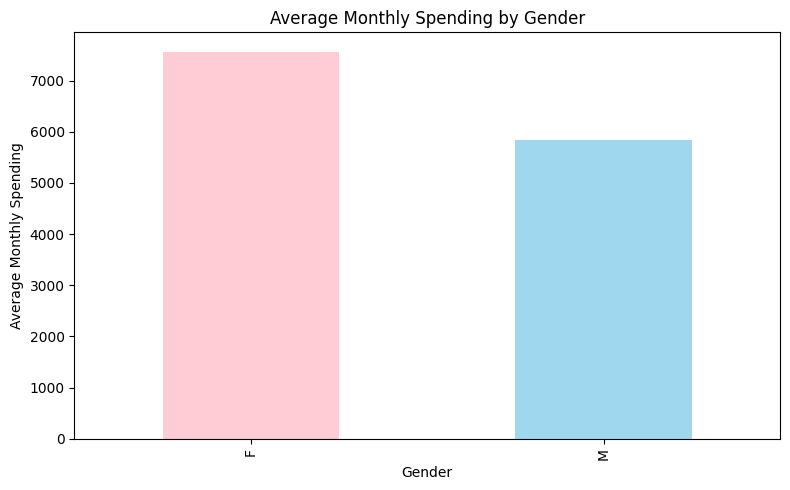

In [39]:
# Group by gender and plot monthly spending
gender_spending = final_df.groupby('gender')['total_monthly_spending'].mean()

# Plot
plt.figure(figsize=(8,5))
gender_spending.plot(kind = 'bar', color = ['pink', 'skyblue'], alpha = 0.8)
plt.title('Average Monthly Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Monthly Spending')
plt.tight_layout()
plt.show()

Female spend more than male on a monthly average. This indicates that this feature is useful for predicting monthly spending of customers. 

#### [4.2] Job category

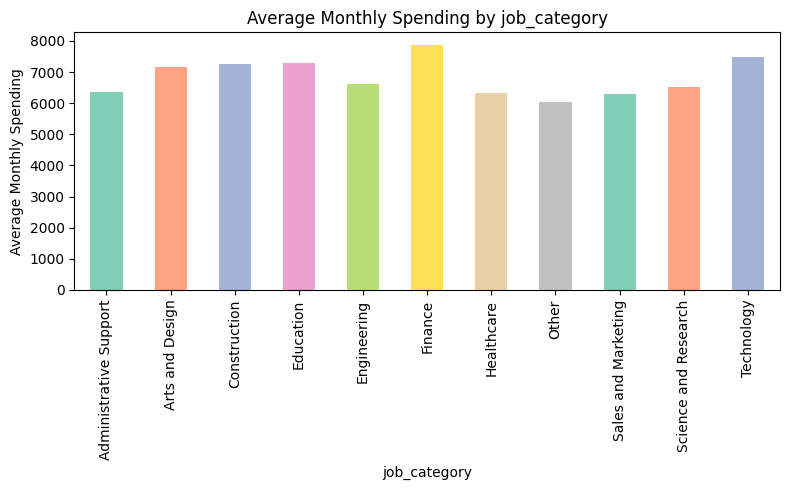

In [40]:
import seaborn as sns

# Group by job category and plot monthly spending
job_category_spending = final_df.groupby('job_category')['total_monthly_spending'].mean()

# Plot
plt.figure(figsize=(8,5))

# Choose a color palette from Seaborn
palette = sns.color_palette("Set2", n_colors=len(job_category_spending))

job_category_spending.plot(kind = 'bar', color = palette, alpha = 0.8)
plt.title('Average Monthly Spending by job_category')
plt.xlabel('job_category')
plt.ylabel('Average Monthly Spending')
plt.tight_layout()
plt.show()

C:\Users\sovan\AppData\Local\Temp\ipykernel_12440\424832915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final_df, x='age', y='total_monthly_spending', palette="viridis", alpha=0.9)


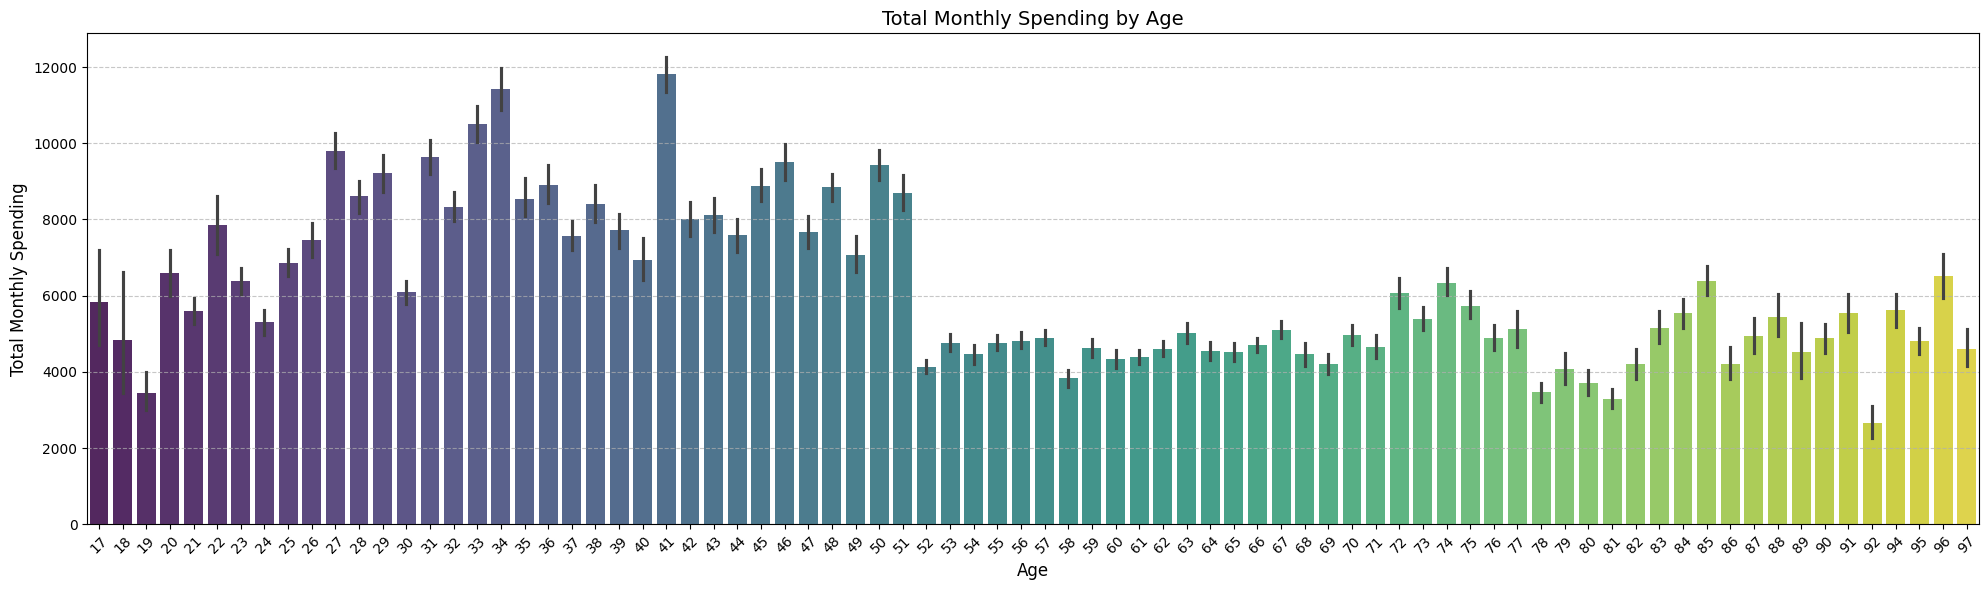

In [41]:
# Plot the data
plt.figure(figsize=(20, 6))
sns.barplot(data=final_df, x='age', y='total_monthly_spending', palette="viridis", alpha=0.9)

# Customize the plot
plt.title('Total Monthly Spending by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Monthly Spending', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

#### [4.3] City Population

In [364]:
grouped_data

,city,total_monthly_spending
0,Abbottstown,12383.080000
1,Abilene,8042.368261
2,Acton,6939.437174
3,Ada,13089.042418
4,Adairville,5056.214667
...,...,...
715,York Haven,5265.091556
716,Youngtown,2150.844889
717,Yuba City,7419.155435
718,Zapata,4321.519333


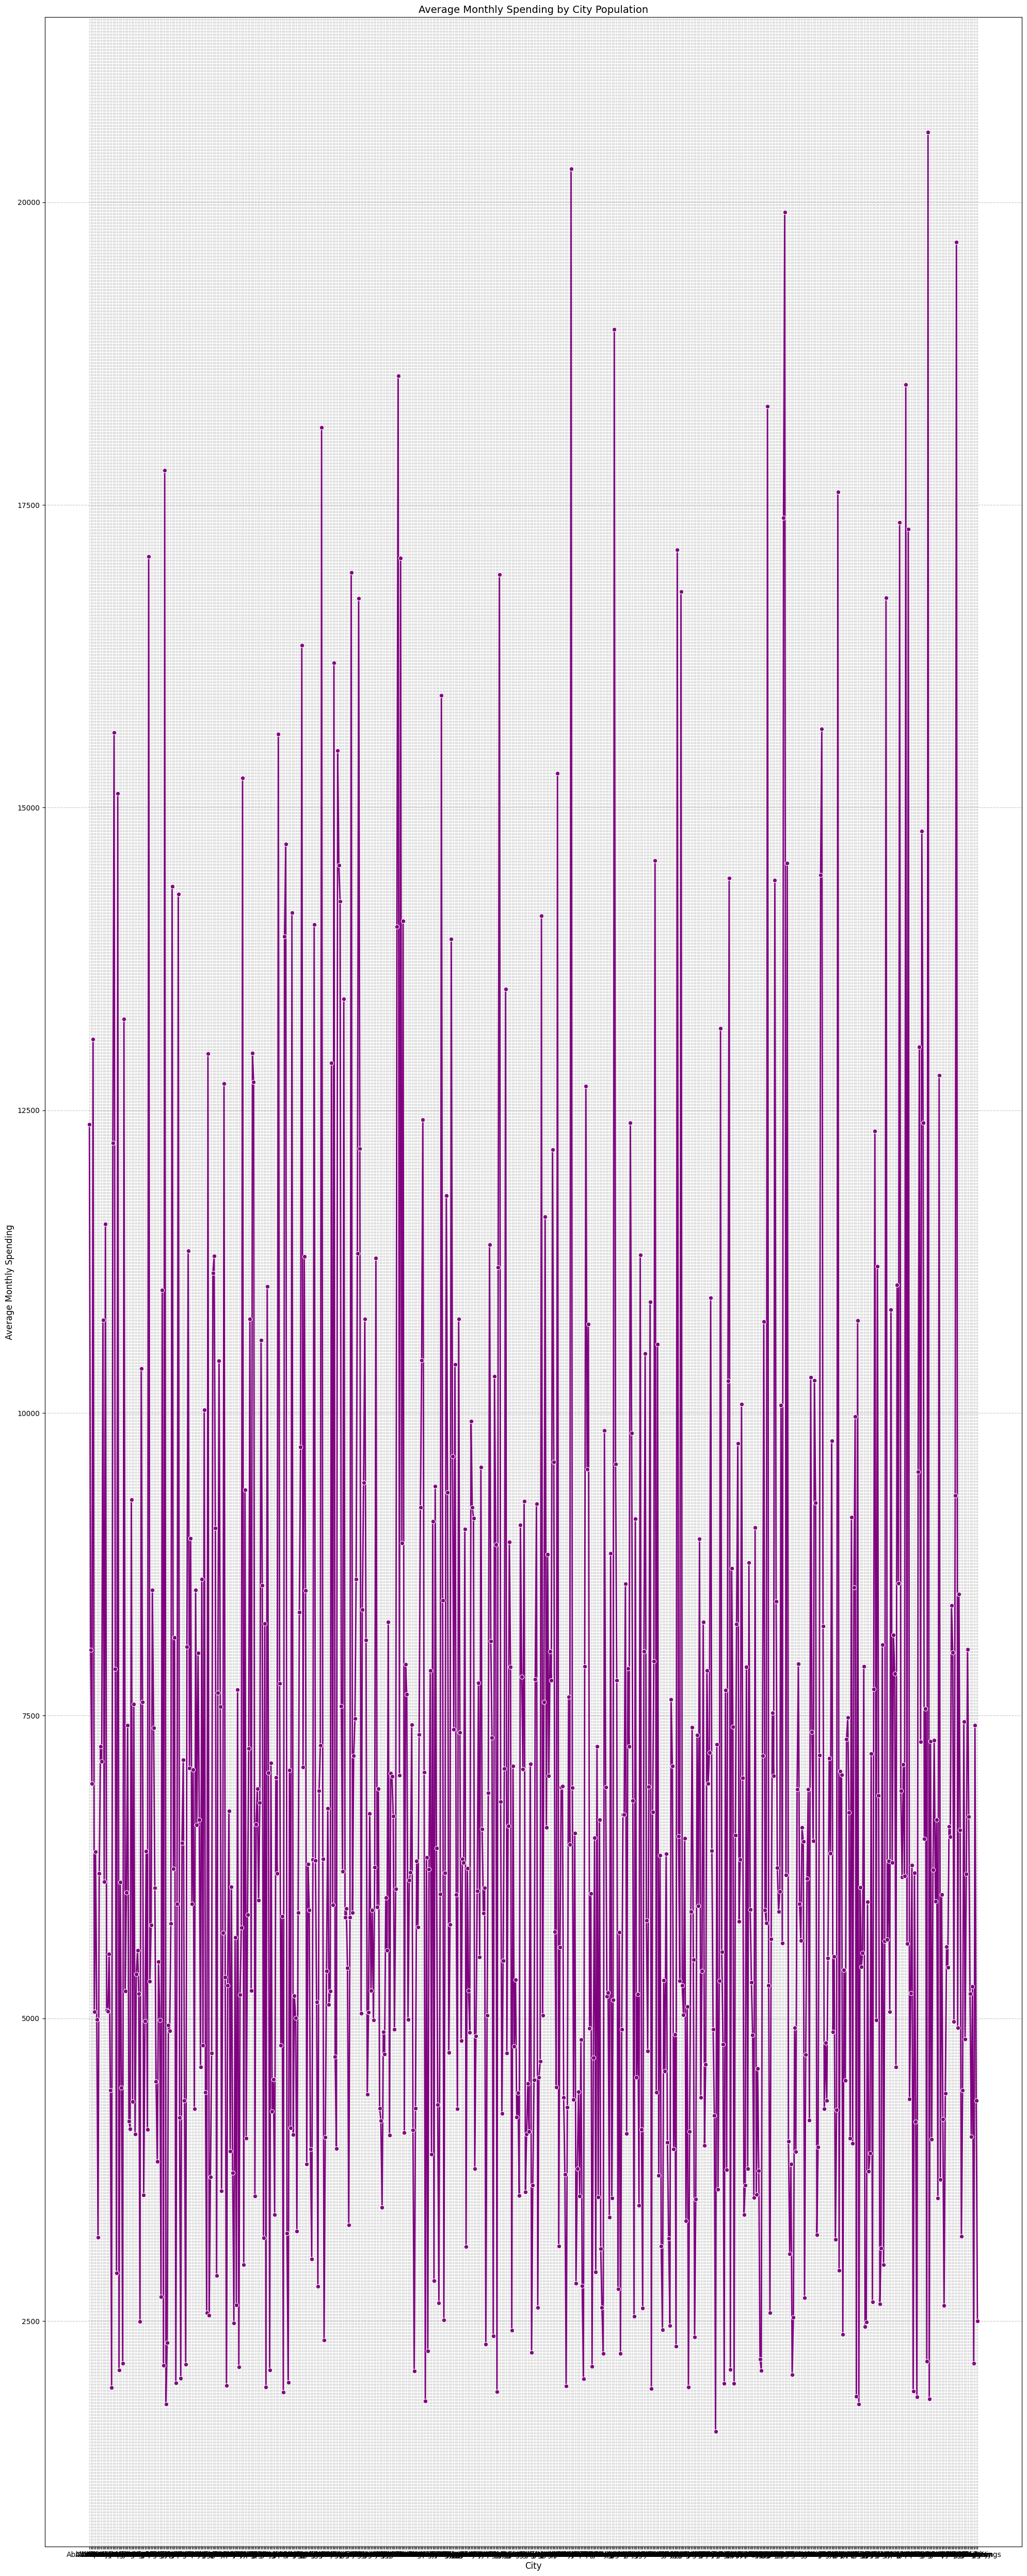

In [363]:
# Group by city population and calculate the mean monthly spending
grouped_data = final_df.groupby('city')['total_monthly_spending'].mean().reset_index()

# Plot the data
plt.figure(figsize=(20, 50))
sns.lineplot(data=grouped_data, x='city', y='total_monthly_spending', marker='o', color='purple', linewidth=2)

# Customize the plot
plt.title('Average Monthly Spending by City Population', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Monthly Spending', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

It seems like it is not a clear positive relation between city population and monthly spending. Including city as a feature instead of city population might be more indicative for model to predict monthly spending

In [43]:
df_city = df[['city', 'cc_num']]

In [44]:
df_city = df_city.drop_duplicates()

In [45]:
df_city

,city,cc_num
0,Ambler,4218196001337
3278,Leland,4351161559407816183
4749,Cordova,4192832764832
10561,Birmingham,4238849696532874
13481,Fargo,4514627048281480
...,...,...
4235108,Denver,30125158904184
4241636,Wasco,180047909863618
4248164,Escondido,4371450311809
4253273,Mattapan,3519925692476886


In [46]:
new_df = pd.merge(final_df, df_city, on = 'cc_num', how = 'inner')

In [47]:
new_df

,cc_num,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,...,personal_care,shopping_net,shopping_pos,travel,num_transactions,gender,city_pop,job_category,age,city
0,60400268763,2018,12,5.39,NaN,NaN,NaN,0.00,0.00,5.39,...,0.00,0.0,0.00,0.00,1,M,270712,Science and Research,67,Mobile
1,60400268763,2019,1,3152.91,5.39,NaN,NaN,0.00,0.00,3152.91,...,0.00,0.0,0.00,0.00,64,M,270712,Science and Research,67,Mobile
2,60400268763,2019,2,9242.60,3152.91,5.39,NaN,0.00,0.00,9242.60,...,0.00,0.0,0.00,0.00,58,M,270712,Science and Research,67,Mobile
3,60400268763,2019,3,5701.32,9242.60,3152.91,5.39,0.00,0.00,5701.32,...,0.00,0.0,0.00,0.00,92,M,270712,Science and Research,67,Mobile
4,60400268763,2019,4,6016.01,5701.32,9242.60,3152.91,0.00,0.00,6016.01,...,0.00,0.0,0.00,0.00,72,M,270712,Science and Research,67,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43797,4986226992066617996,2022,8,4962.25,6822.38,4743.58,4824.19,4452.26,340.38,0.00,...,0.00,0.0,169.61,0.00,127,M,9760,Healthcare,26,Wright City
43798,4986226992066617996,2022,9,4168.69,4962.25,6822.38,4743.58,0.00,4168.69,0.00,...,0.00,0.0,0.00,0.00,105,M,9760,Healthcare,26,Wright City
43799,4986226992066617996,2022,10,12604.28,4168.69,4962.25,6822.38,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,110,M,9760,Healthcare,26,Wright City
43800,4986226992066617996,2022,11,3604.19,12604.28,4168.69,4962.25,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,102,M,9760,Healthcare,26,Wright City


In [48]:
new_df = new_df.drop(['city_pop'], axis = 1)

In [49]:
new_df

,cc_num,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions,gender,job_category,age,city
0,60400268763,2018,12,5.39,NaN,NaN,NaN,0.00,0.00,5.39,...,0.0,0.00,0.0,0.00,0.00,1,M,Science and Research,67,Mobile
1,60400268763,2019,1,3152.91,5.39,NaN,NaN,0.00,0.00,3152.91,...,0.0,0.00,0.0,0.00,0.00,64,M,Science and Research,67,Mobile
2,60400268763,2019,2,9242.60,3152.91,5.39,NaN,0.00,0.00,9242.60,...,0.0,0.00,0.0,0.00,0.00,58,M,Science and Research,67,Mobile
3,60400268763,2019,3,5701.32,9242.60,3152.91,5.39,0.00,0.00,5701.32,...,0.0,0.00,0.0,0.00,0.00,92,M,Science and Research,67,Mobile
4,60400268763,2019,4,6016.01,5701.32,9242.60,3152.91,0.00,0.00,6016.01,...,0.0,0.00,0.0,0.00,0.00,72,M,Science and Research,67,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43797,4986226992066617996,2022,8,4962.25,6822.38,4743.58,4824.19,4452.26,340.38,0.00,...,0.0,0.00,0.0,169.61,0.00,127,M,Healthcare,26,Wright City
43798,4986226992066617996,2022,9,4168.69,4962.25,6822.38,4743.58,0.00,4168.69,0.00,...,0.0,0.00,0.0,0.00,0.00,105,M,Healthcare,26,Wright City
43799,4986226992066617996,2022,10,12604.28,4168.69,4962.25,6822.38,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,110,M,Healthcare,26,Wright City
43800,4986226992066617996,2022,11,3604.19,12604.28,4168.69,4962.25,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,102,M,Healthcare,26,Wright City


#### [4.4] Correlation Heatmap

In [52]:
num_cols = new_df.select_dtypes('number')

In [56]:
corr_matrix = num_cols.corr()

<Axes: >

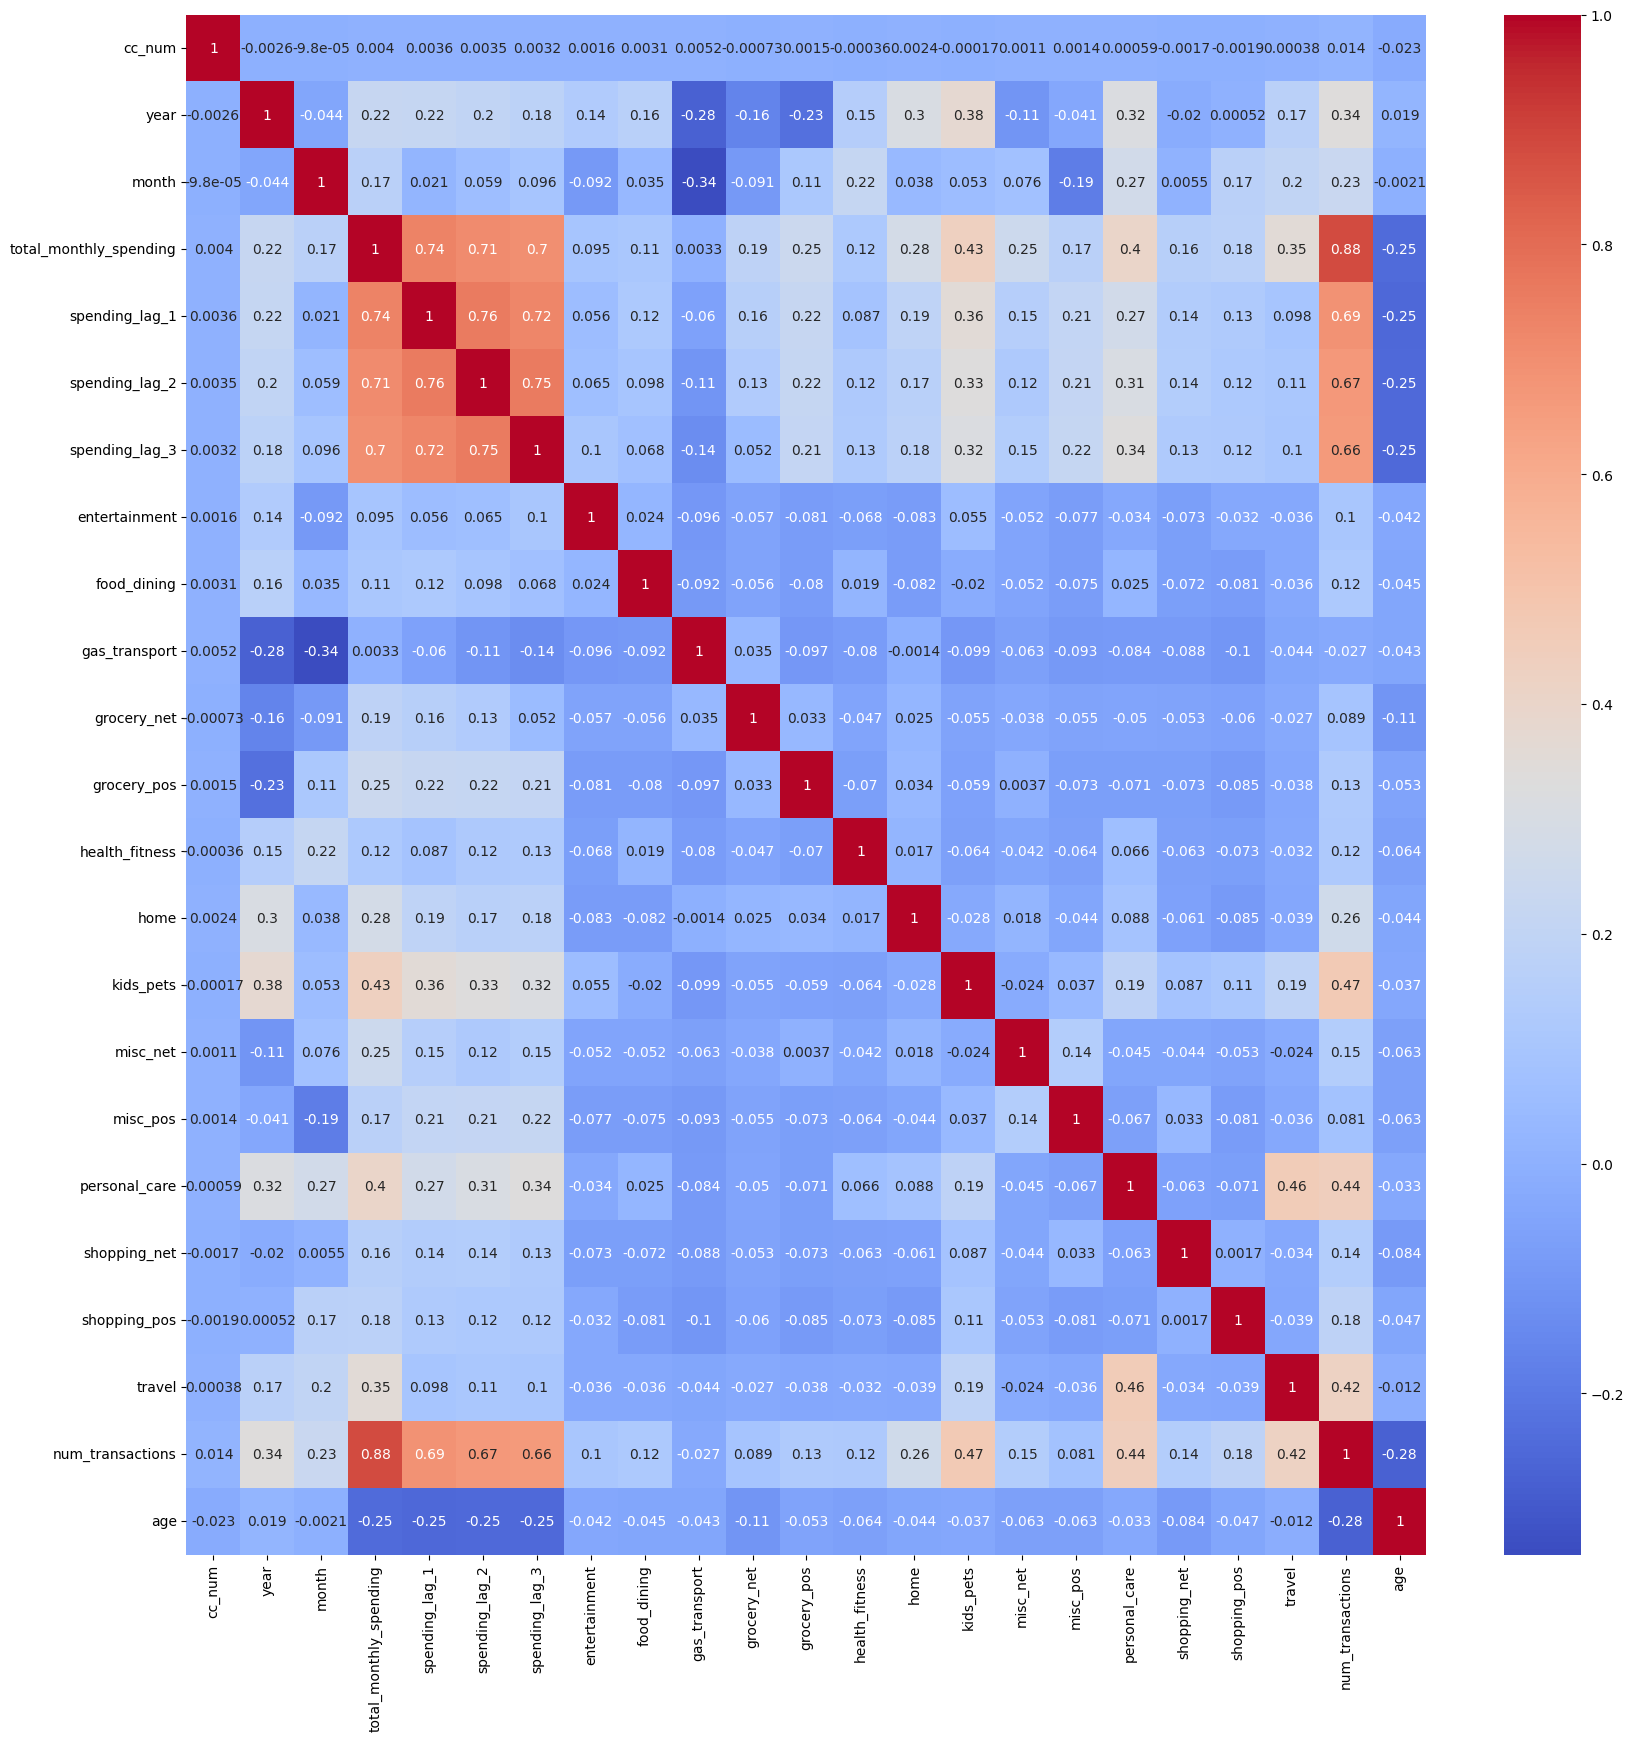

In [62]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap ='coolwarm')

### 5. Data Splitting

In [151]:
df_copy = new_df.copy().drop(['cc_num'], axis = 1)

In [152]:
df_copy.tail()

,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,grocery_net,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions,gender,job_category,age,city
43797,2022,8,4962.25,6822.38,4743.58,4824.19,4452.26,340.38,0.0,0.0,...,0.0,0.00,0.0,169.61,0.00,127,M,Healthcare,26,Wright City
43798,2022,9,4168.69,4962.25,6822.38,4743.58,0.00,4168.69,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,105,M,Healthcare,26,Wright City
43799,2022,10,12604.28,4168.69,4962.25,6822.38,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,110,M,Healthcare,26,Wright City
43800,2022,11,3604.19,12604.28,4168.69,4962.25,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,102,M,Healthcare,26,Wright City
43801,2022,12,12115.65,3604.19,12604.28,4168.69,0.00,0.00,0.0,0.0,...,0.0,8088.39,0.0,0.00,1539.66,213,M,Healthcare,26,Wright City


+ We will split data into train and test. 2022 data will be the testing set and year < 2022 will be training

In [153]:
train_df = df_copy[df_copy['year'] < 2022]

In [154]:
train_df

,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,grocery_net,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions,gender,job_category,age,city
0,2018,12,5.39,NaN,NaN,NaN,0.0,0.0,5.39,0.0,...,0.0,0.0,0.0,0.0,0.0,1,M,Science and Research,67,Mobile
1,2019,1,3152.91,5.39,NaN,NaN,0.0,0.0,3152.91,0.0,...,0.0,0.0,0.0,0.0,0.0,64,M,Science and Research,67,Mobile
2,2019,2,9242.60,3152.91,5.39,NaN,0.0,0.0,9242.60,0.0,...,0.0,0.0,0.0,0.0,0.0,58,M,Science and Research,67,Mobile
3,2019,3,5701.32,9242.60,3152.91,5.39,0.0,0.0,5701.32,0.0,...,0.0,0.0,0.0,0.0,0.0,92,M,Science and Research,67,Mobile
4,2019,4,6016.01,5701.32,9242.60,3152.91,0.0,0.0,6016.01,0.0,...,0.0,0.0,0.0,0.0,0.0,72,M,Science and Research,67,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43773,2021,8,4686.26,6237.14,6022.85,5939.29,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,99,F,Sales and Marketing,85,Strongsville
43774,2021,9,3429.83,4686.26,6237.14,6022.85,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,62,F,Sales and Marketing,85,Strongsville
43775,2021,10,5823.72,3429.83,4686.26,6237.14,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,106,F,Sales and Marketing,85,Strongsville
43776,2021,11,5125.32,5823.72,3429.83,4686.26,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,92,F,Sales and Marketing,85,Strongsville


In [155]:
test_df = df_copy[df_copy['year'] == 2022]

In [156]:
test_df

,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,grocery_net,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions,gender,job_category,age,city
37,2022,1,5229.30,8517.44,4794.68,5280.47,0.00,0.00,2286.67,0.00,...,0.00,0.00,0.00,0.00,0.00,87,M,Science and Research,67,Mobile
38,2022,2,5114.51,5229.30,8517.44,4794.68,0.00,0.00,2221.68,4.38,...,0.00,0.00,0.00,0.00,0.00,91,M,Science and Research,67,Mobile
39,2022,3,7304.92,5114.51,5229.30,8517.44,0.00,0.00,74.58,464.45,...,0.00,0.00,0.00,0.00,0.00,127,M,Science and Research,67,Mobile
40,2022,4,7875.90,7304.92,5114.51,5229.30,0.00,0.00,0.00,0.00,...,172.68,0.00,0.00,0.00,0.00,135,M,Science and Research,67,Mobile
41,2022,5,6758.72,7875.90,7304.92,5114.51,0.00,0.00,0.00,0.00,...,2925.88,0.00,404.71,0.00,0.00,120,M,Science and Research,67,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43797,2022,8,4962.25,6822.38,4743.58,4824.19,4452.26,340.38,0.00,0.00,...,0.00,0.00,0.00,169.61,0.00,127,M,Healthcare,26,Wright City
43798,2022,9,4168.69,4962.25,6822.38,4743.58,0.00,4168.69,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,105,M,Healthcare,26,Wright City
43799,2022,10,12604.28,4168.69,4962.25,6822.38,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,110,M,Healthcare,26,Wright City
43800,2022,11,3604.19,12604.28,4168.69,4962.25,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,102,M,Healthcare,26,Wright City


### 6. One-hot encode and scaling

In [312]:
# Sort by ascending time
train_df = train_df.sort_values(by = ['year', 'month'])

In [313]:
train_df

,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,grocery_net,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions,gender,job_category,age,city
0,2018,12,5.39,NaN,NaN,NaN,0.0,0.0,5.39,0.0,...,0.0,0.0,0.0,0.0,0.0,1,M,Science and Research,67,Mobile
49,2018,12,35.84,NaN,NaN,NaN,0.0,0.0,35.84,0.0,...,0.0,0.0,0.0,0.0,0.0,1,F,Other,29,Battle Creek
98,2018,12,123.98,NaN,NaN,NaN,0.0,0.0,123.98,0.0,...,0.0,0.0,0.0,0.0,0.0,3,M,Science and Research,45,Rochester
195,2018,12,199.03,NaN,NaN,NaN,0.0,0.0,199.03,0.0,...,0.0,0.0,0.0,0.0,0.0,1,F,Arts and Design,41,Brooklyn
244,2018,12,124.16,NaN,NaN,NaN,0.0,0.0,124.16,0.0,...,0.0,0.0,0.0,0.0,0.0,2,M,Technology,50,Cleveland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43583,2021,12,14363.39,5962.08,9862.31,6583.13,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,169,F,Science and Research,40,Broadway
43632,2021,12,5296.92,3233.17,2336.80,2330.37,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,101,F,Engineering,67,Roanoke
43680,2021,12,18404.49,9053.61,9150.12,9592.94,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,205,F,Science and Research,34,Westborough
43728,2021,12,8489.66,5450.05,5279.90,4684.05,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,159,F,Healthcare,94,Fort Lauderdale


In [314]:
# Drop NA
train_df = train_df.dropna()

In [315]:
train_df

,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,grocery_net,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions,gender,job_category,age,city
3,2019,3,5701.32,9242.60,3152.91,5.39,0.0,0.0,5701.32,0.00,...,0.0,0.0,0.0,0.0,0.0,92,M,Science and Research,67,Mobile
52,2019,3,14394.33,9496.64,8462.48,35.84,0.0,0.0,2881.61,11512.72,...,0.0,0.0,0.0,0.0,0.0,118,F,Other,29,Battle Creek
101,2019,3,7044.65,3895.19,4241.29,123.98,0.0,0.0,7044.65,0.00,...,0.0,0.0,0.0,0.0,0.0,104,M,Science and Research,45,Rochester
198,2019,3,17349.08,16580.86,13079.96,199.03,0.0,0.0,4051.94,13297.14,...,0.0,0.0,0.0,0.0,0.0,151,F,Arts and Design,41,Brooklyn
247,2019,3,6595.73,3875.62,4499.52,124.16,0.0,0.0,6595.73,0.00,...,0.0,0.0,0.0,0.0,0.0,115,M,Technology,50,Cleveland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43583,2021,12,14363.39,5962.08,9862.31,6583.13,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,169,F,Science and Research,40,Broadway
43632,2021,12,5296.92,3233.17,2336.80,2330.37,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,101,F,Engineering,67,Roanoke
43680,2021,12,18404.49,9053.61,9150.12,9592.94,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,205,F,Science and Research,34,Westborough
43728,2021,12,8489.66,5450.05,5279.90,4684.05,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,159,F,Healthcare,94,Fort Lauderdale


In [316]:
from my_krml_ratana.data.sets import pop_target

In [317]:
X_train, y_train = pop_target(train_df, 'total_monthly_spending')

In [318]:
X_train

,year,month,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions,gender,job_category,age,city
3,2019,3,9242.60,3152.91,5.39,0.0,0.0,5701.32,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,92,M,Science and Research,67,Mobile
52,2019,3,9496.64,8462.48,35.84,0.0,0.0,2881.61,11512.72,0.0,...,0.0,0.0,0.0,0.0,0.0,118,F,Other,29,Battle Creek
101,2019,3,3895.19,4241.29,123.98,0.0,0.0,7044.65,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,104,M,Science and Research,45,Rochester
198,2019,3,16580.86,13079.96,199.03,0.0,0.0,4051.94,13297.14,0.0,...,0.0,0.0,0.0,0.0,0.0,151,F,Arts and Design,41,Brooklyn
247,2019,3,3875.62,4499.52,124.16,0.0,0.0,6595.73,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,115,M,Technology,50,Cleveland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43583,2021,12,5962.08,9862.31,6583.13,0.0,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,169,F,Science and Research,40,Broadway
43632,2021,12,3233.17,2336.80,2330.37,0.0,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,101,F,Engineering,67,Roanoke
43680,2021,12,9053.61,9150.12,9592.94,0.0,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,205,F,Science and Research,34,Westborough
43728,2021,12,5450.05,5279.90,4684.05,0.0,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,159,F,Healthcare,94,Fort Lauderdale


In [319]:
y_train

3         5701.32
52       14394.33
101       7044.65
198      17349.08
247       6595.73
           ...   
43583    14363.39
43632     5296.92
43680    18404.49
43728     8489.66
43777     9897.36
Name: total_monthly_spending, Length: 29467, dtype: float64

In [320]:
test_df = test_df.sort_values(by=['year', 'month'])

In [321]:
test_df = test_df.dropna()

In [322]:
test_df

,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,grocery_net,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions,gender,job_category,age,city
37,2022,1,5229.30,8517.44,4794.68,5280.47,0.0,0.0,2286.67,0.00,...,0.0,0.00,0.0,0.0,0.00,87,M,Science and Research,67,Mobile
86,2022,1,11692.66,14089.46,11452.55,10690.44,0.0,0.0,3330.75,2164.32,...,0.0,0.00,0.0,0.0,0.00,146,F,Other,29,Battle Creek
135,2022,1,13859.00,14090.68,9835.25,7272.76,0.0,0.0,6951.01,0.00,...,0.0,0.00,0.0,0.0,0.00,189,M,Science and Research,45,Rochester
183,2022,1,6969.72,8973.27,5756.28,4418.93,0.0,0.0,3822.92,0.00,...,0.0,0.00,0.0,0.0,0.00,102,M,Other,66,Bronx
232,2022,1,13513.14,28187.22,19019.92,11725.00,0.0,0.0,2035.71,420.85,...,0.0,0.00,0.0,0.0,0.00,175,F,Arts and Design,41,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43644,2022,12,13128.41,6890.63,6980.36,6419.23,0.0,0.0,0.00,0.00,...,0.0,3065.50,0.0,0.0,8929.95,226,F,Engineering,67,Roanoke
43692,2022,12,43475.50,16857.00,19685.57,19746.95,0.0,0.0,0.00,0.00,...,0.0,20260.47,0.0,0.0,14177.60,522,F,Science and Research,34,Westborough
43740,2022,12,8870.98,3888.74,5090.80,5345.39,0.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.0,8870.98,161,F,Healthcare,94,Fort Lauderdale
43789,2022,12,20554.31,7656.67,9094.85,8079.43,0.0,0.0,0.00,0.00,...,0.0,3475.96,0.0,0.0,15979.62,276,F,Sales and Marketing,85,Strongsville


In [323]:
X_test, y_test = pop_target(test_df, 'total_monthly_spending')

In [324]:
X_test

,year,month,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions,gender,job_category,age,city
37,2022,1,8517.44,4794.68,5280.47,0.0,0.0,2286.67,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,87,M,Science and Research,67,Mobile
86,2022,1,14089.46,11452.55,10690.44,0.0,0.0,3330.75,2164.32,0.0,...,0.0,0.00,0.0,0.0,0.00,146,F,Other,29,Battle Creek
135,2022,1,14090.68,9835.25,7272.76,0.0,0.0,6951.01,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,189,M,Science and Research,45,Rochester
183,2022,1,8973.27,5756.28,4418.93,0.0,0.0,3822.92,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,102,M,Other,66,Bronx
232,2022,1,28187.22,19019.92,11725.00,0.0,0.0,2035.71,420.85,0.0,...,0.0,0.00,0.0,0.0,0.00,175,F,Arts and Design,41,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43644,2022,12,6890.63,6980.36,6419.23,0.0,0.0,0.00,0.00,0.0,...,0.0,3065.50,0.0,0.0,8929.95,226,F,Engineering,67,Roanoke
43692,2022,12,16857.00,19685.57,19746.95,0.0,0.0,0.00,0.00,0.0,...,0.0,20260.47,0.0,0.0,14177.60,522,F,Science and Research,34,Westborough
43740,2022,12,3888.74,5090.80,5345.39,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,0.0,8870.98,161,F,Healthcare,94,Fort Lauderdale
43789,2022,12,7656.67,9094.85,8079.43,0.0,0.0,0.00,0.00,0.0,...,0.0,3475.96,0.0,0.0,15979.62,276,F,Sales and Marketing,85,Strongsville


In [325]:
y_test

37        5229.30
86       11692.66
135      13859.00
183       6969.72
232      13513.14
           ...   
43644    13128.41
43692    43475.50
43740     8870.98
43789    20554.31
43801    12115.65
Name: total_monthly_spending, Length: 11404, dtype: float64

In [326]:
cat_cols = X_train.select_dtypes(exclude=['number']).columns
num_cols = X_train.select_dtypes(include=['number']).columns.difference(['month', 'year']) # Exclude month and year

In [327]:
num_cols

Index(['age', 'entertainment', 'food_dining', 'gas_transport', 'grocery_net',
       'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
       'misc_pos', 'num_transactions', 'personal_care', 'shopping_net',
       'shopping_pos', 'spending_lag_1', 'spending_lag_2', 'spending_lag_3',
       'travel'],
      dtype='object')

In [328]:
cat_cols

Index(['gender', 'job_category', 'city'], dtype='object')

### [6.1] One-hot encode categorical variables

In [329]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [330]:
ohe = OneHotEncoder(sparse_output = False, drop='first')

In [331]:
encode_cat = ohe.fit_transform(X_train[cat_cols])

In [332]:
encode_cat_df = pd.DataFrame(encode_cat,
                            columns=ohe.get_feature_names_out(cat_cols),
                            index = X_train.index)

In [333]:
encode_cat_df

,gender_M,job_category_Arts and Design,job_category_Construction,job_category_Education,job_category_Engineering,job_category_Finance,job_category_Healthcare,job_category_Other,job_category_Sales and Marketing,job_category_Science and Research,...,city_Woodbridge,city_Woodside,city_Worcester,city_Worton,city_Xenia,city_York,city_York Haven,city_Youngtown,city_Yuba City,city_Zapata
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43632,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43728,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### [6.2] Standard scale numerical variables

In [334]:
scaler = StandardScaler()

In [335]:
scaled_numerical = scaler.fit_transform(X_train[num_cols])
scaled_numerical_df = pd.DataFrame(scaled_numerical,
                                  columns= num_cols,
                                  index = X_train.index)

In [336]:
scaled_numerical_df

,age,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,num_transactions,personal_care,shopping_net,shopping_pos,spending_lag_1,spending_lag_2,spending_lag_3,travel
3,0.936020,-0.304227,-0.291853,3.616919,-0.211299,-0.311565,-0.253230,-0.166344,-0.022473,-0.19607,-0.294736,0.161113,-0.023381,-0.281678,-0.322058,0.808734,-0.589367,-1.274909,-0.015146
52,-1.146640,-0.304227,-0.291853,1.690342,5.728916,-0.311565,-0.253230,-0.166344,-0.022473,-0.19607,-0.294736,0.665040,-0.023381,-0.281678,-0.322058,0.867161,0.630868,-1.267980,-0.015146
101,-0.269730,-0.304227,-0.291853,4.534754,-0.211299,-0.311565,-0.253230,-0.166344,-0.022473,-0.19607,-0.294736,0.393695,-0.023381,-0.281678,-0.322058,-0.421134,-0.339237,-1.247920,-0.015146
198,-0.488958,-0.304227,-0.291853,2.489974,6.649622,-0.311565,-0.253230,-0.166344,-0.022473,-0.19607,-0.294736,1.304640,-0.023381,-0.281678,-0.322058,2.496484,1.692049,-1.230840,-0.015146
247,0.004304,-0.304227,-0.291853,4.228028,-0.211299,-0.311565,-0.253230,-0.166344,-0.022473,-0.19607,-0.294736,0.606895,-0.023381,-0.281678,-0.322058,-0.425635,-0.279891,-1.247879,-0.015146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43583,-0.543765,-0.304227,-0.291853,-0.278528,-0.211299,-0.311565,0.103302,8.211777,-0.022473,-0.19607,-0.294736,1.653513,-0.023381,-0.281678,-0.322058,0.054237,0.952575,0.222079,-0.015146
43632,0.936020,-0.304227,-0.291853,-0.278528,-0.211299,-0.311565,-0.253230,3.067340,-0.022473,-0.19607,-0.294736,0.335549,-0.023381,-0.281678,-0.322058,-0.573394,-0.776923,-0.745781,-0.015146
43680,-0.872606,-0.304227,-0.291853,-0.278528,-0.211299,-0.311565,0.001016,10.790833,-0.022473,-0.19607,-0.294736,2.351258,-0.023381,-0.281678,-0.322058,0.765267,0.788901,0.907063,-0.015146
43728,2.415805,-0.304227,-0.291853,-0.278528,-0.211299,-0.311565,-0.253230,5.016456,-0.022473,-0.19607,-0.294736,1.459695,-0.023381,-0.281678,-0.322058,-0.063527,-0.100546,-0.210122,-0.015146


In [337]:
X_train = pd.concat([X_train[['month', 'year']], scaled_numerical_df,encode_cat_df ], axis = 1)

In [338]:
X_train

,month,year,age,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,city_Woodbridge,city_Woodside,city_Worcester,city_Worton,city_Xenia,city_York,city_York Haven,city_Youngtown,city_Yuba City,city_Zapata
3,3,2019,0.936020,-0.304227,-0.291853,3.616919,-0.211299,-0.311565,-0.253230,-0.166344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,3,2019,-1.146640,-0.304227,-0.291853,1.690342,5.728916,-0.311565,-0.253230,-0.166344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,3,2019,-0.269730,-0.304227,-0.291853,4.534754,-0.211299,-0.311565,-0.253230,-0.166344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,3,2019,-0.488958,-0.304227,-0.291853,2.489974,6.649622,-0.311565,-0.253230,-0.166344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,3,2019,0.004304,-0.304227,-0.291853,4.228028,-0.211299,-0.311565,-0.253230,-0.166344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43583,12,2021,-0.543765,-0.304227,-0.291853,-0.278528,-0.211299,-0.311565,0.103302,8.211777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43632,12,2021,0.936020,-0.304227,-0.291853,-0.278528,-0.211299,-0.311565,-0.253230,3.067340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43680,12,2021,-0.872606,-0.304227,-0.291853,-0.278528,-0.211299,-0.311565,0.001016,10.790833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43728,12,2021,2.415805,-0.304227,-0.291853,-0.278528,-0.211299,-0.311565,-0.253230,5.016456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [339]:
# Apply the same to test data

In [340]:
encode_cat = ohe.fit_transform(X_test[cat_cols])
encode_cat_df = pd.DataFrame(encode_cat,
                            columns=ohe.get_feature_names_out(cat_cols),
                            index = X_test.index)

In [341]:
scaled_numerical = scaler.fit_transform(X_test[num_cols])
scaled_numerical_df = pd.DataFrame(scaled_numerical,
                                  columns= num_cols,
                                  index = X_test.index)

In [342]:
X_test = pd.concat([X_test[['month', 'year']], scaled_numerical_df,encode_cat_df ], axis = 1)

In [343]:
X_test

,month,year,age,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,city_Worcester,city_Worton,city_Wright City,city_Xenia,city_York,city_York Haven,city_Youngtown,city_Yuba City,city_Zapata,city_Zolfo Springs
37,1,2022,0.880915,-0.267473,-0.298192,1.604366,-0.216700,-0.286312,-0.273421,0.542582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,1,2022,-1.168389,-0.267473,-0.298192,2.481904,1.640571,-0.286312,-0.273421,1.811160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,1,2022,-0.305524,-0.267473,-0.298192,5.524695,-0.216700,-0.286312,-0.273421,2.088029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183,1,2022,0.826986,-0.267473,-0.298192,2.895568,-0.216700,-0.286312,-0.273421,0.622154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,1,2022,-0.521240,-0.267473,-0.298192,1.393436,0.144444,-0.286312,-0.273421,3.704889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43644,12,2022,0.880915,-0.267473,-0.298192,-0.317557,-0.216700,-0.286312,-0.273421,-0.604270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43692,12,2022,-0.898743,-0.267473,-0.298192,-0.317557,-0.216700,-0.286312,-0.273421,-0.604270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43740,12,2022,2.337000,-0.267473,-0.298192,-0.317557,-0.216700,-0.286312,-0.273421,-0.604270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43789,12,2022,1.851638,-0.267473,-0.298192,-0.317557,-0.216700,-0.286312,-0.273421,-0.604270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [344]:
# Find columns in X_train but not in X_test
columns_in_train_not_test = set(X_train.columns) - set(X_test.columns)

# Find columns in X_test but not in X_train
columns_in_test_not_train = set(X_test.columns) - set(X_train.columns)

# Print the results
print("Columns in X_train but not in X_test:", columns_in_train_not_test)
print("Columns in X_test but not in X_train:", columns_in_test_not_train)

Columns in X_train but not in X_test: set()
Columns in X_test but not in X_train: {'city_Pulaski', 'city_Cherokee Village', 'city_Waco', 'city_Goldsboro', 'city_Max Meadows', 'city_Russell', 'city_Freeport', 'city_Burlington', 'city_Pollock', 'city_Kennedale', 'city_Portage', 'city_Joplin', 'city_Alturas', 'city_Elko', 'city_Poughkeepsie', 'city_Bellevue', 'city_Wailuku', 'city_Sparta', 'city_Newnan', 'city_Sugar Land', 'city_Andover', 'city_Billings', 'city_Pomona', 'city_Wright City', 'city_Kahului', 'city_Zolfo Springs', 'city_Owings', 'city_Hattiesburg', 'city_Tinley Park', 'city_Lexington Park', 'city_Lawrenceville', 'city_Renton', 'city_Sag Harbor', 'city_Elyria', 'city_Aiken', 'city_Lincoln Park', 'city_Sioux Falls', 'city_Fullerton', 'city_Northville', 'city_Blairsville', 'city_Moline', 'city_Watertown', 'city_Pierce City', 'city_Dothan', 'city_Odenton', 'city_Dry Ridge', 'city_Buckeye', 'city_Palatine', 'city_Ruffin', 'city_Norwalk', 'city_Fruitland Park', 'city_Celina', 'city

In [345]:
# Fill missing set with zeroes

# Get all unique columns from both X_train and X_test
all_columns = set(X_train.columns).union(set(X_test.columns))

# Add missing columns to X_train with zero values
for col in all_columns:
    if col not in X_train.columns:
        X_train[col] = 0

# Add missing columns to X_test with zero values
for col in all_columns:
    if col not in X_test.columns:
        X_test[col] = 0


In [346]:
X_train['spending_lag_1']

3        0.808734
52       0.867161
101     -0.421134
198      2.496484
247     -0.425635
           ...   
43583    0.054237
43632   -0.573394
43680    0.765267
43728   -0.063527
43777   -0.138213
Name: spending_lag_1, Length: 29467, dtype: float64

In [347]:
X_test

,month,year,age,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,city_Worcester,city_Worton,city_Wright City,city_Xenia,city_York,city_York Haven,city_Youngtown,city_Yuba City,city_Zapata,city_Zolfo Springs
37,1,2022,0.880915,-0.267473,-0.298192,1.604366,-0.216700,-0.286312,-0.273421,0.542582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,1,2022,-1.168389,-0.267473,-0.298192,2.481904,1.640571,-0.286312,-0.273421,1.811160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,1,2022,-0.305524,-0.267473,-0.298192,5.524695,-0.216700,-0.286312,-0.273421,2.088029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183,1,2022,0.826986,-0.267473,-0.298192,2.895568,-0.216700,-0.286312,-0.273421,0.622154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,1,2022,-0.521240,-0.267473,-0.298192,1.393436,0.144444,-0.286312,-0.273421,3.704889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43644,12,2022,0.880915,-0.267473,-0.298192,-0.317557,-0.216700,-0.286312,-0.273421,-0.604270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43692,12,2022,-0.898743,-0.267473,-0.298192,-0.317557,-0.216700,-0.286312,-0.273421,-0.604270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43740,12,2022,2.337000,-0.267473,-0.298192,-0.317557,-0.216700,-0.286312,-0.273421,-0.604270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43789,12,2022,1.851638,-0.267473,-0.298192,-0.317557,-0.216700,-0.286312,-0.273421,-0.604270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [348]:
X_train

,month,year,age,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,city_Pollock,city_Kahului,city_Renton,city_Northville,city_Pierce City,city_Alturas,city_Newnan,city_Kennedale,city_Burlington,city_Elyria
3,3,2019,0.936020,-0.304227,-0.291853,3.616919,-0.211299,-0.311565,-0.253230,-0.166344,...,0,0,0,0,0,0,0,0,0,0
52,3,2019,-1.146640,-0.304227,-0.291853,1.690342,5.728916,-0.311565,-0.253230,-0.166344,...,0,0,0,0,0,0,0,0,0,0
101,3,2019,-0.269730,-0.304227,-0.291853,4.534754,-0.211299,-0.311565,-0.253230,-0.166344,...,0,0,0,0,0,0,0,0,0,0
198,3,2019,-0.488958,-0.304227,-0.291853,2.489974,6.649622,-0.311565,-0.253230,-0.166344,...,0,0,0,0,0,0,0,0,0,0
247,3,2019,0.004304,-0.304227,-0.291853,4.228028,-0.211299,-0.311565,-0.253230,-0.166344,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43583,12,2021,-0.543765,-0.304227,-0.291853,-0.278528,-0.211299,-0.311565,0.103302,8.211777,...,0,0,0,0,0,0,0,0,0,0
43632,12,2021,0.936020,-0.304227,-0.291853,-0.278528,-0.211299,-0.311565,-0.253230,3.067340,...,0,0,0,0,0,0,0,0,0,0
43680,12,2021,-0.872606,-0.304227,-0.291853,-0.278528,-0.211299,-0.311565,0.001016,10.790833,...,0,0,0,0,0,0,0,0,0,0
43728,12,2021,2.415805,-0.304227,-0.291853,-0.278528,-0.211299,-0.311565,-0.253230,5.016456,...,0,0,0,0,0,0,0,0,0,0


#### Train Validation Split

In [356]:
# Drop year column
X_train = X_train.drop(['year'], axis = 1)

In [357]:
# Drop year column
X_test = X_test.drop(['year'], axis = 1)

In [358]:
X_train

,month,age,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,...,city_Pollock,city_Kahului,city_Renton,city_Northville,city_Pierce City,city_Alturas,city_Newnan,city_Kennedale,city_Burlington,city_Elyria
3,3,0.936020,-0.304227,-0.291853,3.616919,-0.211299,-0.311565,-0.253230,-0.166344,-0.022473,...,0,0,0,0,0,0,0,0,0,0
52,3,-1.146640,-0.304227,-0.291853,1.690342,5.728916,-0.311565,-0.253230,-0.166344,-0.022473,...,0,0,0,0,0,0,0,0,0,0
101,3,-0.269730,-0.304227,-0.291853,4.534754,-0.211299,-0.311565,-0.253230,-0.166344,-0.022473,...,0,0,0,0,0,0,0,0,0,0
198,3,-0.488958,-0.304227,-0.291853,2.489974,6.649622,-0.311565,-0.253230,-0.166344,-0.022473,...,0,0,0,0,0,0,0,0,0,0
247,3,0.004304,-0.304227,-0.291853,4.228028,-0.211299,-0.311565,-0.253230,-0.166344,-0.022473,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43583,12,-0.543765,-0.304227,-0.291853,-0.278528,-0.211299,-0.311565,0.103302,8.211777,-0.022473,...,0,0,0,0,0,0,0,0,0,0
43632,12,0.936020,-0.304227,-0.291853,-0.278528,-0.211299,-0.311565,-0.253230,3.067340,-0.022473,...,0,0,0,0,0,0,0,0,0,0
43680,12,-0.872606,-0.304227,-0.291853,-0.278528,-0.211299,-0.311565,0.001016,10.790833,-0.022473,...,0,0,0,0,0,0,0,0,0,0
43728,12,2.415805,-0.304227,-0.291853,-0.278528,-0.211299,-0.311565,-0.253230,5.016456,-0.022473,...,0,0,0,0,0,0,0,0,0,0
